In [26]:
import numpy as np
import lightcones
import math
import lightcones as lc
import lightcones.linalg as la
import matplotlib.pyplot as plt
from lightcones.linalg import mv
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

n_sites = 100
e = 2
h = 0.5
es = [e]*n_sites
hs = [h]*(n_sites-1)
n_i=10

Для частицы локализованной узле $n_i$ посчитаем функцию Вигнера
$$\rho = \ket{n_i}\bra{n_i}$$
$$
	W(m,k)= \sum_{n=-\infty}^{n=+\infty} \frac{1}{2 \pi} \bra{n}\ket{n_i}\bra{n_i}\ket{m-n} e^{-ik(2n-m)} =\delta_{m, 2n_i}
$$

In [27]:
#Для частицы на узле n_i
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    rho_w = np.zeros((ns, ns), dtype=complex)
    rho_w[n_i, n_i] = 1.0
 # |n_i><n_i|

    #for i in range(ns):
        #for j in range(2*ns):
            #if j == i:
                #rho_w[i, j] = e
            #elif j == i - 1 or j == i + 1:
                #rho_w[i, j] = h
            #else:
                #rho_w[i, j] = 0

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho_w[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_


In [28]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

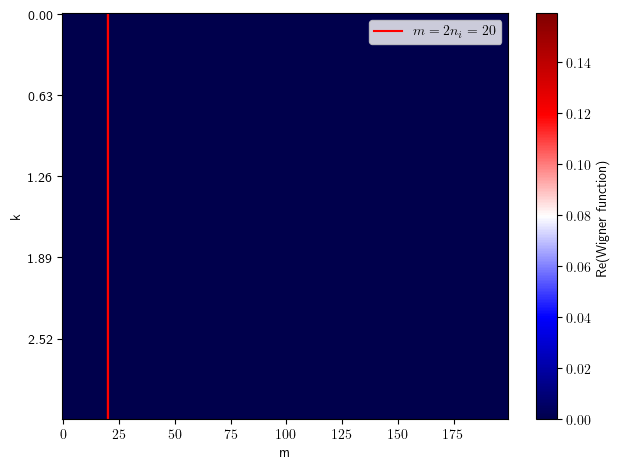

In [31]:
max_ = np.max(np.abs(w_p[:]))
min_ = np.min(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_)

plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.axvline(x=2*n_i, color='red', linestyle='-', label=f'$m = 2n_i = {2*n_i}$')
plt.legend()
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Выходит дельта функция, но не на узле $n_i$, а на узле $2n_i$.

Аналогично построим для плоской волны с импульсом $q$:
\begin{equation}
	\ket{\psi} = \ket{q} = \sum_{n=-\infty}^{n=+\infty} e^{i n q }\ket{n}
\end{equation}
Вспомним равенство: 
\begin{equation}
	\sum_{k=-\infty}^{k=+\infty} e^{2 \pi i k t } = \sum_{n=-\infty}^{n=+\infty} \delta (n-t)
\end{equation}
$$
	\hat{ \rho } =  \sum_n \sum_m	e^{i q (n-m)}\ket{n}\bra{m}\\
	\bra{n'} \hat{\rho} \ket{m'-n'} =  \sum_n \sum_m	e^{i q (n-m)}\delta_{n,n'}\delta_{m,m'-n'}=\\
	= \sum_m e^{i q (n-m)} \delta_{m'-m,n'} = e^{i q (2n'-m')} \\
	W(m',k) = \sum_{n'} e^{-i k (2 n' - m ')} e^{i q (2n' - m')} = e^{- i m' (q-k)} \sum_{n'} e^{i 2 n'(q-k)} =  e^{- i m' (q-k) }\sum_{r} \delta(r-\frac{q-k}{\pi}) 
$$

In [33]:
def wigner(n_sites, k, q):
    nk = len(k)
    ns = n_sites
    rho = np.zeros((ns, ns), dtype=complex)

    # Построение плотностной матрицы |q><q|
    for n in range(ns):
        for m in range(ns):
            rho[n, m] = np.exp(1j * q * (n - m))

    # Вычисление функции Вигнера
    w_ = np.zeros((nk, 2*ns), dtype=complex)
    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

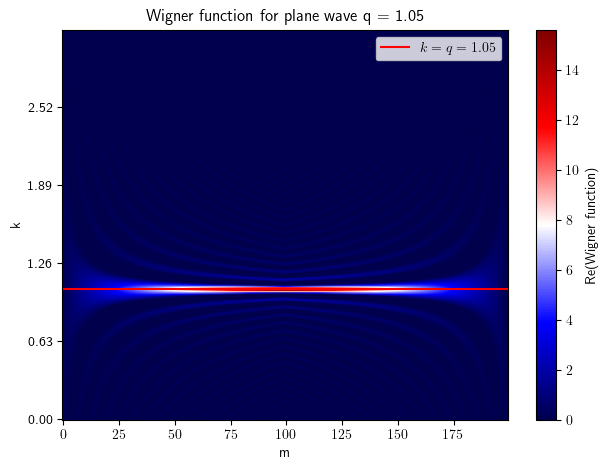

In [ ]:
q = np.pi / 3  # импульс плоской волны
k = np.linspace(0, np.pi, 300)

w_p = wigner(n_sites, k, q)

max_ = np.max(np.abs(w_p[:]))
min_ = np.min(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
# Найдём индекс, соответствующий k = q
k_index = np.argmin(np.abs(k - q))  # или q = np.pi / 3

plt.axhline(y=k_index, color='red', linestyle='-', label=f'$k = q = {q:.2f}$')
plt.legend()
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')
plt.title(f'Wigner function for plane wave q = {q:.2f}')
plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

Рассмотрим одночастичный гамильтониан на цепочке
\begin{equation}
H_{n,m} \;=\; e\,\delta_{n,m} \;+\; h\,(\delta_{n,m+1}+\delta_{n,m-1}),
\qquad n,m\in\{0,1,2,\dots\}.
\end{equation}

\begin{equation}
W_H(m,k) \;=\; \frac{1}{2\pi}\sum_{n} e^{-ik(2n-m)}\,H_{n,\,m-n}.
\end{equation}



Подстановка диагональной части даёт
\begin{equation}
H_{n,m-n}^{(\text{diag})}=e\,\delta_{n,m-n}
\quad\Rightarrow\quad n=\frac{m}{2}.
\end{equation}
Это возможно только при чётных $m$ и даёт
\begin{equation}
W_{\text{diag}}(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ чётное},\\[6pt]
0, & m \text{ нечётное}.
\end{cases}
\end{equation}



\begin{equation}
H_{n,m-n}^{(\text{hop})}=h\,\delta_{n,\,m-n+1}+h\,\delta_{n,\,m-n-1}.
\end{equation}
Первое условие даёт $2n=m+1\Rightarrow n=\frac{m+1}{2}$ и $2n-m=1$,
второе $2n=m-1\Rightarrow n=\frac{m-1}{2}$ и $2n-m=-1$.
Оба существуют только при нечётных $m$, следовательно
\begin{equation}
W_{\text{hop}}(m,k)=
\begin{cases}
\dfrac{h}{\pi}\,\cos k, & m \text{ нечётное},\\[6pt]
0, & m \text{ чётное}.
\end{cases}
\end{equation}


Для бесконечной цепочки:
\begin{equation}
W_H(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ чётное},\\[6pt]
\dfrac{h}{\pi}\cos k, & m \text{ нечётное},\\[6pt]
0, & \text{иначе}.
\end{cases}
\end{equation}

Для трёхдиагонального гамельтониана построим $H_w$

In [61]:
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    
    """"
     Матрица гамильтониана для полубесконечной цепочки,
    усечённой до узлов 0..N (размер (N+1)x(N+1)).
    """
    H = np.zeros((ns, ns), dtype=complex)
    # Диагональ
    np.fill_diagonal(H, e)
    # Связи между соседями
    for n in range(ns-1):
        H[n, n+1] = h
        H[n+1, n] = h


    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += H[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

In [62]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

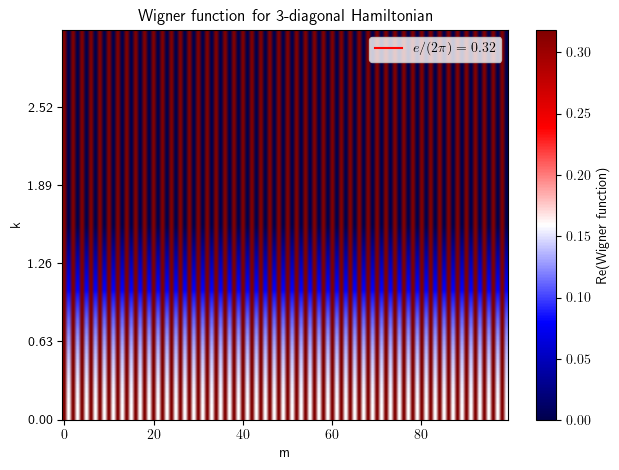

In [63]:
max_ = np.max(np.abs(w_p[:]))
min_ = np.min(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2\\pi)= {e/(2*np.pi):.2f}$')
plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian')
# 🎨 Добавляем colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')